importo pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO

: 

Cargo datos

In [64]:
signals = pd.read_csv('c:/data/B001/eeg.dat', delimiter=' ', names = ['timestamp','counter','eeg','attention','meditation','blinking'])

In [65]:
print('Estructura de la informacion:')
print(signals.head())

Estructura de la informacion:
      timestamp  counter  eeg  attention  meditation  blinking
0  1.655925e+09       68   32          0           0         0
1  1.655925e+09       69   40          0           0         0
2  1.655925e+09       70   42          0           0         0
3  1.655925e+09       71   34          0           0         0
4  1.655925e+09       72   24          0           0         0


Me quedo con la columna de eeg, Me fijo en el inicio y fin del timestamp para coordinar con el video.
Uso el sitio  https://timestamp.online/ para ver a que min y seg corresponde

In [66]:
data = signals.values
eeg = data[:,2]
print(data[0,0])
print(data[35840,0])
print(data[len(data)-1,0])

1655924764.97
1655924834.68
1655925424.92


In [67]:
print(eeg)

[ 32.  40.  42. ...  91. 114. 103.]


Grafico

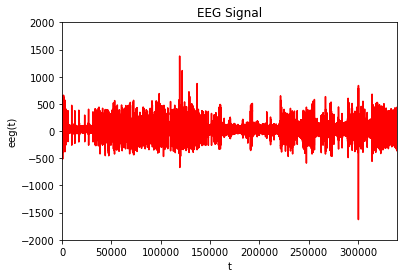

In [68]:
plt.plot(eeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-2000, 2000]);
plt.xlim([0,len(eeg)])
plt.show()

In [69]:
(len(eeg)/512)/60


11.044954427083333

le pongo base que es lo que esta entre 20.06.10 y 20.07.10

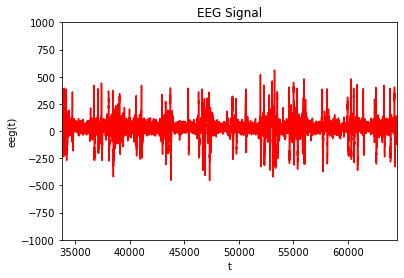

In [71]:
plt.plot(eeg,'r', label='EEG base')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'EEG Signal')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-1000, 1000]);
plt.xlim([33792,64511])
plt.show()

In [72]:
#eegBASE=eeg[3071:33791]
eegToser=eeg[33791:64511]

In [73]:
EEGtotal=eeg
eeg=eegToser
#eeg=eegBASE

Corro el filtros temporales (filter_temporal.py)

Largo 1 30720
Largo 2 10922
Largo 3 25281


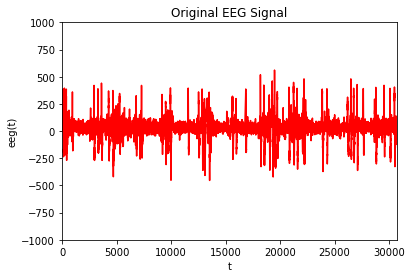

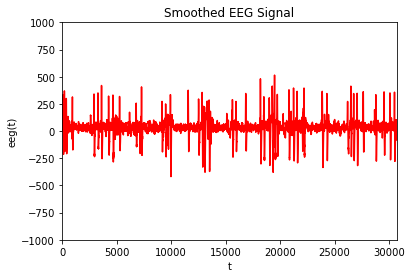

Before Scaling...
 min  is -454.0
 max  is 561.0

After Scaling...
 min is -0.8092691622103387
 max is 1.0


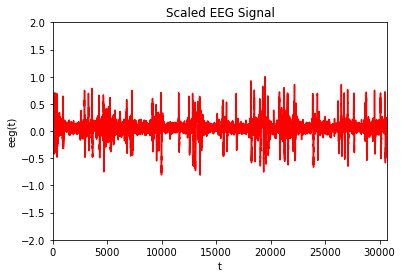

Before Scaling...
 min  is -454.0
 max  is 561.0

After Scaling...
 min is 0.0
 max is 1.0


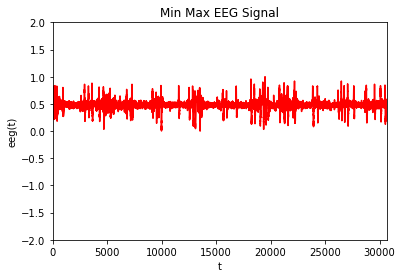

Before ZScore...
 min  is -454.0
 max is 561.0

After ZScore...
 min is -5.106337281612332
 max  is 5.577485907570814


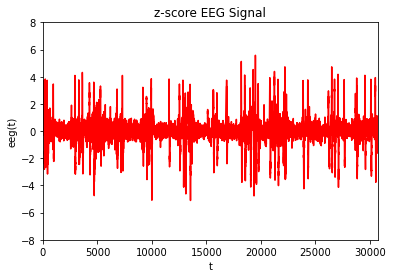

Before BoxCox...
 min  is -454.0
 max  is 561.0

After BoxCox...
 min is 0.0
 max  is 5022.413489758603


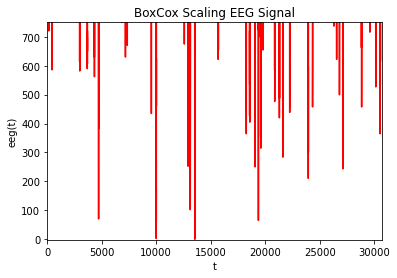

In [74]:
eegf1 = eeg[eeg>50]

# Muchas veces lo que me interesa es saber los índices (que en series de tiempo representan el tiempo) donde el filtro es positivo
# Esto se hace con el comando np.where
idxeeg1f = np.where( eeg > 50 )

# Filtro los valores que son mayores a 10 y menores que -40
eegf2 = eeg[np.logical_or(eeg>10,eeg<-40)] 

print("Largo 1 %2d" % len(eeg))
print("Largo 2 %2d" % len(eegf1))
print("Largo 3 %2d" % len(eegf2))

plt.plot(eeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Original EEG Signal')     # r'' representa un raw string que no tiene caracteres especiales
plt.ylim([-1000, 1000]);
plt.xlim([0,len(eeg)])
plt.savefig('images/signal.png')
plt.show()


# La operación de convolución permite implementar el suavizado del Moving Average
windowlength = 10
avgeeg = np.convolve(eeg, np.ones((windowlength,))/windowlength, mode='same')

# El kernel/máscara está compuesto de 10 valores de 1/10.  Cuando esos valores se suman para cada posición, implica que se reemplaza el valor por el promedio
# de los 5 valores anteriores y 4 posteriores.

plt.plot(avgeeg,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Smoothed EEG Signal')     
plt.ylim([-1000, 1000]);
plt.xlim([0,len(avgeeg)])
plt.savefig('images/smoothed.png')
plt.show()


# Scaling and normalizing are somehow temporal filters

# Feature scaling, Xnew = Xold / Xmax, everything will be on the range 0-1

def simple_feature_scaling(arr):
    """This method applies simple-feature-scaling
        to a distribution (arr).
    @param arr: An array or list or series object
    @return: The arr with all features simply scaled
    """

    arr_max = max(arr)
    new_arr = [i/arr_max for i in arr]

    return new_arr
  
# Let's define an array arr
  
eeg_scaled = simple_feature_scaling(eeg)

print(f'Before Scaling...\n min  is {min(eeg)}\n max  is {max(eeg)}\n')
print(f'After Scaling...\n min is {min(eeg_scaled)}\n max is {max(eeg_scaled)}')

plt.plot(eeg_scaled,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Scaled EEG Signal')     
plt.ylim([-2, 2]);
plt.xlim([0,len(avgeeg)])
plt.savefig('images/scaledeeg.png')
plt.show()

# Min-Max Scaling, Xnew = (Xold - Xmin) / (Xmax - Xmin)

def min_max_scaling(arr):
    """This method applies min-max-scaling
        to a distribution (arr).
    @param arr: An array or list or series object
    @return: The arr with all features min-max scaled
    """

    arr_max = max(arr)
    arr_min = min(arr)
    range_ = arr_max - arr_min

    new_arr = [(i-arr_min)/range_ for i in arr]

    return new_arr
  
  # Let's define an arr and call the min-max scaler
  
eeg_minmax = min_max_scaling(eeg)

print(f'Before Scaling...\n min  is {min(eeg)}\n max  is {max(eeg)}\n')
print(f'After Scaling...\n min is {min(eeg_minmax)}\n max is {max(eeg_minmax)}')

plt.plot(eeg_minmax,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'Min Max EEG Signal')     
plt.ylim([-2, 2]);
plt.xlim([0,len(avgeeg)])
plt.savefig('images/minmaxeeg.png')
plt.show()

# Normalization, "Statistical Normalization" means pushing the data to match to a Normal Distribution.
# (Normalization is also considered in terms of vector normalization, divide by the norm.)
# This is also call, "Standarization" = "Statistical Normalization"

# Z-Score, Xnew = Xold - Xmean / Xstd, everything is around -1 to 1

def z_score_norm(arr):
    """Apply z-score normalization
        to an array or series
    """
    mean_ = np.mean(arr)
    std_ = np.std(arr)

    new_arr = [(i-mean_)/std_ for i in arr]

    return new_arr

eeg_zscore = z_score_norm(eeg)

print(f'Before ZScore...\n min  is {min(eeg)}\n max is {max(eeg)}\n')
print(f'After ZScore...\n min is {min(eeg_zscore)}\n max  is {max(eeg_zscore)}')

plt.plot(eeg_zscore,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'z-score EEG Signal')     
plt.ylim([-8, 8]);
plt.xlim([0,len(avgeeg)])
plt.savefig('images/zscoredeeg.png')
plt.show()


# Box-Cox Normalization:  Transform the data to look more normal N()
from scipy import stats

eeg2 = eeg + abs(min(eeg)) + 1
eeg_boxcox, _ = stats.boxcox(eeg2)

print(f'Before BoxCox...\n min  is {min(eeg)}\n max  is {max(eeg)}\n')
print(f'After BoxCox...\n min is {min(eeg_boxcox)}\n max  is {max(eeg_boxcox)}')

plt.plot(eeg_boxcox,'r', label='EEG')
plt.xlabel('t');
plt.ylabel('eeg(t)');
plt.title(r'BoxCox Scaling EEG Signal')     
plt.ylim([-2, 750]);
plt.xlim([0,len(avgeeg)])
plt.savefig('images/boxcoxeeg.png')
plt.show()

Ahora hago ventanas deslizantes y extraigo features.
Signal Features


Automatically created module for IPython interactive environment
Temporal Features
Peak-To-Peak:733.0
Root Mean Square:53.663874191388445
Crest Factor:8.832757737719648
Shannon Entropy:6.585425484649069
Activity:2879.8113932291667
Complexity:0.20517010784726727
Mobidity:4.818307441505392
Fractal:1.01055129043301


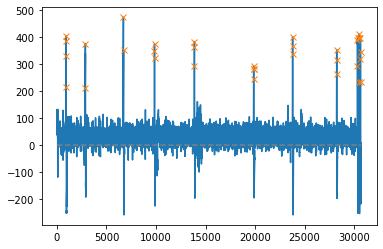

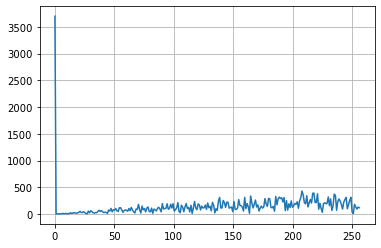

PSD:5099.27695664659
[-1.6872505333689543, -1.1066067016825527, -0.7559874370947951, -0.3558787709774037, -0.3015293218423377, -0.21395504627978146, -0.14990394093649714, -0.05938981069991188, -0.03051821899575998, -0.005920370874959147]
[-0.2046009728777024, -0.4014917410567014, -0.6340234263679937, -1.2058330100823524, -1.345867210913637, -1.647060235283781, -1.971776429873197, -2.8531805494683593, -3.504651732646434, -5.132314909239629]
x = [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y = [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss / Cross Entropy = 0.3329
0.3329129870740799


In [57]:

print(__doc__)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import fft

import math

from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta
from scipy.signal import butter, filtfilt, buttord

from scipy.signal import butter, lfilter

import matplotlib.pyplot as plt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def psd(y):
    # Number of samplepoints
    N = 512
    # sample spacing
    T = 1.0 / 512.0
    # From 0 to N, N*T, 2 points.
    #x = np.linspace(0.0, 1.0, N)
    #y = 1*np.sin(10.0 * 2.0*np.pi*x) + 9*np.sin(20.0 * 2.0*np.pi*x)


    # Original Bandpass
    fs = 512.0
    fso2 = fs/2
    #Nd,wn = buttord(wp=[9/fso2,11/fso2], ws=[8/fso2,12/fso2],
    #   gpass=3.0, gstop=40.0)
    #b,a = butter(Nd,wn,'band')
    #y = filtfilt(b,a,y)

    y = butter_bandpass_filter(y, 8.0, 15.0, fs, order=6)


    yf = fft(y)
    #xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))
    #import matplotlib.pyplot as plt
    #plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
    #plt.axis((0,60,0,1))
    #plt.grid()
    #plt.show()

    return np.sum(np.abs(yf[0:int(N/2)]))

def crest_factor(x):
    return np.max(np.abs(x))/np.sqrt(np.mean(np.square(x)))

def hjorth(a):
    r"""
    Compute Hjorth parameters [HJO70]_.
    .. math::
        Activity = m_0 = \sigma_{a}^2
    .. math::
        Complexity = m_2 = \sigma_{d}/ \sigma_{a}
    .. math::
        Morbidity = m_4 =  \frac{\sigma_{dd}/ \sigma_{d}}{m_2}
    Where:
    :math:`\sigma_{x}^2` is the mean power of a signal :math:`x`. That is, its variance, if it's mean is zero.
    :math:`a`, :math:`d` and :math:`dd` represent the original signal, its first and second derivatives, respectively.
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which appear to uses a non normalised (by the length of the signal) definition of the activity:
        .. math::
            \sigma_{a}^2 = \sum{\mathbf{x}[i]^2}
        As opposed to
        .. math::
            \sigma_{a}^2 = \frac{1}{n}\sum{\mathbf{x}[i]^2}
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: activity, complexity and morbidity
    :rtype: tuple(float, float, float)
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> activity, complexity, morbidity = pr.univariate.hjorth(noise)
    """

    first_deriv = np.diff(a)
    second_deriv = np.diff(a,2)

    var_zero = np.mean(a ** 2)
    var_d1 = np.mean(first_deriv ** 2)
    var_d2 = np.mean(second_deriv ** 2)

    activity = var_zero
    morbidity = np.sqrt(var_d1 / var_zero)
    complexity = np.sqrt(var_d2 / var_d1) / morbidity

    return activity, morbidity, complexity

def pfd(a):
    r"""
    Compute Petrosian Fractal Dimension of a time series [PET95]_.
    It is defined by:
    .. math::
        \frac{log(N)}{log(N) + log(\frac{N}{N+0.4N_{\delta}})}
    .. note::
        **Difference with PyEEG:**
        Results is different from [PYEEG]_ which implemented an apparently erroneous formulae:
        .. math::
            \frac{log(N)}{log(N) + log(\frac{N}{N}+0.4N_{\delta})}
    Where:
    :math:`N` is the length of the time series, and
    :math:`N_{\delta}` is the number of sign changes.
    :param a: a one dimensional floating-point array representing a time series.
    :type a: :class:`~numpy.ndarray` or :class:`~pyrem.time_series.Signal`
    :return: the Petrosian Fractal Dimension; a scalar.
    :rtype: float
    Example:
    >>> import pyrem as pr
    >>> import numpy as np
    >>> # generate white noise:
    >>> noise = np.random.normal(size=int(1e4))
    >>> pr.univariate.pdf(noise)
    """

    diff = np.diff(a)
    # x[i] * x[i-1] for i in t0 -> tmax
    prod = diff[1:-1] * diff[0:-2]

    # Number of sign changes in derivative of the signal
    N_delta = np.sum(prod < 0)
    n = len(a)

    return np.log(n)/(np.log(n)+np.log(n/(n+0.4*N_delta)))



# Sampling frequency of 512 Hz

print('Temporal Features')
#eeg es eegBASE


# %%
ptp = abs(np.max(eeg)) + abs(np.min(eeg))
rms = np.sqrt(np.mean(eeg**2))
cf = crest_factor(eeg)

print ('Peak-To-Peak:' + str(ptp))
print ('Root Mean Square:' + str(rms))
print ('Crest Factor:' + str(cf))

from collections import Counter
from scipy import stats

entropy = stats.entropy(list(Counter(eeg).values()), base=2)

print('Shannon Entropy:' + str(entropy))


activity, complexity, morbidity = hjorth(eeg)

print('Activity:' + str(activity))
print('Complexity:' + str(complexity))
print('Mobidity:' + str(morbidity))



fractal = pfd(eeg)
print('Fractal:' + str(fractal))

import matplotlib.pyplot as plt
from scipy.signal import find_peaks

peaks, _ = find_peaks(eeg, height=200)
plt.plot(eeg)
plt.plot(peaks, eeg[peaks], "x")
plt.plot(np.zeros_like(eeg), "--", color="gray")
plt.show()


N = 512
T = 1.0 / 512.0

# We can put an additional frequency component to verify that things are working ok
shamsignal = False
if (shamsignal):
    x= np.linspace(0.0, 1.0, N)
    eeg = eeg[:512] +  100*np.sin(10.0 * 2.0*np.pi*x)


yf = fft(eeg)
xf = np.linspace(0.0, int(1.0/(2.0*T)), int(N/2))

plt.close()

plt.plot(xf, 2.0/N * np.abs(yf[0:int(N/2)]))
plt.grid()
plt.show()

print('PSD:' + str(psd(eeg[:128])))

# %%
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)

# %%
from math import log

y_inv = np.asarray([1-val for val in y_pred])
y_i = np.asarray([1-val for val in y])


sum1 = [log(val) for val in y_pred]
sum2 = [log(val) for val in y_inv]
print(sum1)
print(sum2)


s1 = sum1 * y
s2 = sum2 * y_i

Hq = - 1.0 / len(y_pred) * (s1.sum()+ s2.sum())

# Logloss is binary cross entropy. 
print('x = {}'.format(x))
print('y = {}'.format(y))
print('p(y) = {}'.format(np.round(y_pred, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))
print (Hq)